In [3]:
import os
import pandas as pd

In [4]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))

In [5]:
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [6]:
df.columns

Index(['Unnamed: 0', 'hitparada', 'rok', 'tyden', 'pozice', 'track',
       'interpret', 'interpret_hlavni', 'vydavatel', 'id', 'stazeno',
       'nazev_wiki', 'popis_en', 'popis_cs', 'velikost', 'zanry',
       'datum_narozeni', 'datum_umrti', 'zacatek_pusobeni', 'konec_pusobeni',
       'zalozeni', 'zanik', 'gender', 'misto_puvodu', 'zeme_puvodu',
       'obcanstvi', 'etnicita', 'hlas', 'nastroje', 'oceneni', 'nabozenstvi',
       'orientace', 'spotify_id', 'spotify_odberatele'],
      dtype='object')

## Vyplněnost wikidat po letech

<Axes: xlabel='rok'>

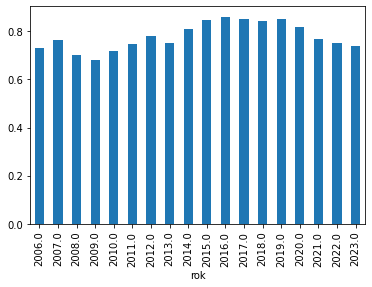

In [7]:
(df[df['stazeno'] == True].groupby('rok')['interpret_hlavni'].nunique() / df.groupby('rok')['interpret_hlavni'].nunique()).plot.bar()

## Věk (lidé)

In [8]:
df['vek'] = df['rok'] - df['datum_narozeni']

<Axes: xlabel='rok'>

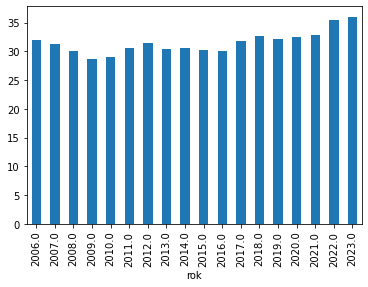

In [9]:
df.groupby('rok')['vek'].mean().plot.bar()

<Axes: xlabel='rok'>

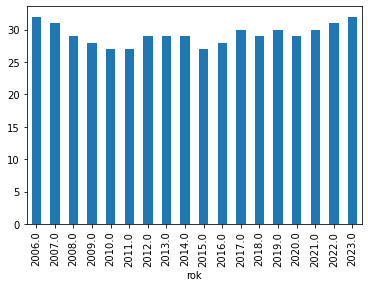

In [10]:
df.groupby('rok')['vek'].median().plot.bar()

↑ Zajímavý! Ale může to bejt tím, že mladí interpreti z posledních dvou let ještě nemají tak pečlivě vyplněné profily na wikidatech. Todo: zkusit dopočítat, jakej rozdíl to asi dělá.

## Gender

In [11]:
df['gender'].drop_duplicates()

0               žena
414              muž
491             None
1081             NaN
38146    genderfluid
52007      nebinární
Name: gender, dtype: object

<Axes: xlabel='rok'>

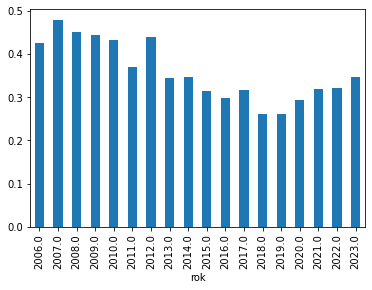

In [12]:
(df[df['gender'] == 'žena'].groupby('rok')['interpret_hlavni'].nunique() / df[df['velikost'] == 'člověk'].groupby('rok')['interpret_hlavni'].nunique()).plot.bar()

<Axes: xlabel='rok'>

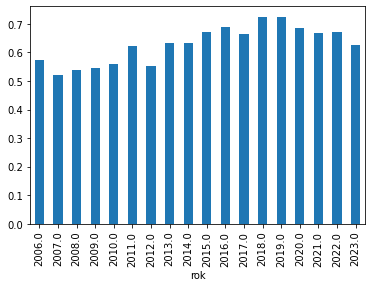

In [13]:
(df[df['gender'] == 'muž'].groupby('rok')['interpret_hlavni'].nunique() / df[df['velikost'] == 'člověk'].groupby('rok')['interpret_hlavni'].nunique()).plot.bar()

I tady bacha – může to promítat i preference editorů wikidat, třeba radši přidávaj muže.
Taky to nijak nereflektuje frontmanstvo kapel.

## Země původu

### Jednotlivé země v top 100

<Axes: xlabel='rok'>

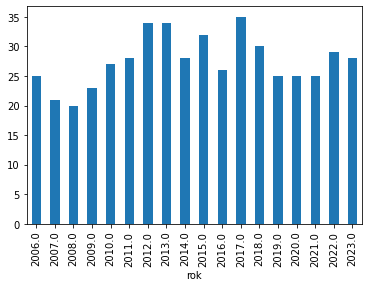

In [14]:
df.groupby('rok')['zeme_puvodu'].nunique().plot.bar()

<Axes: xlabel='rok'>

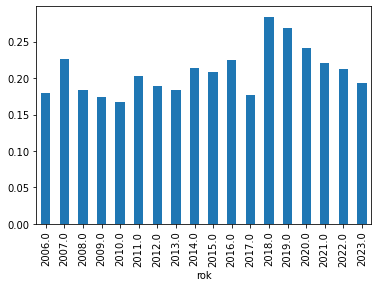

In [15]:
pd.Series(df[df['zeme_puvodu'] == 'Česko'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

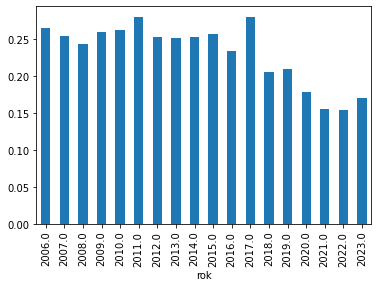

In [16]:
pd.Series(df[df['zeme_puvodu'] == 'Spojené státy americké'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

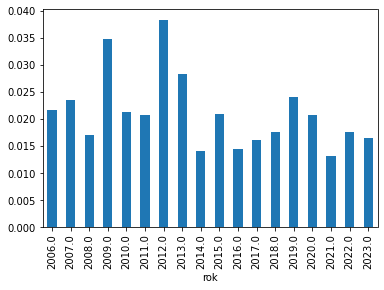

In [17]:
pd.Series(df[df['zeme_puvodu'] == 'Slovensko'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

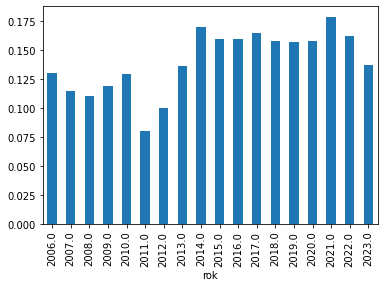

In [18]:
pd.Series(df[df['zeme_puvodu'] == 'Spojené království'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

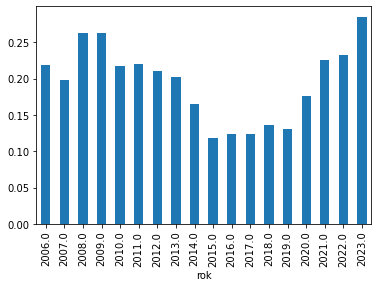

In [19]:
pd.Series(df[df['zeme_puvodu'].isnull()].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

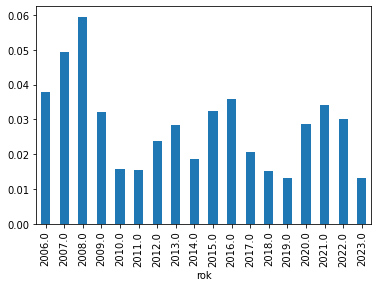

In [20]:
pd.Series(df[df['zeme_puvodu'] == 'Kanada'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

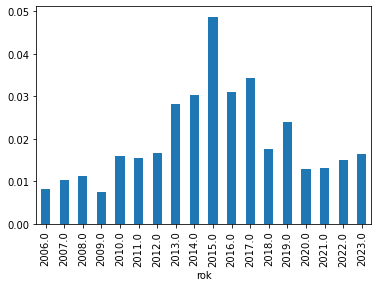

In [21]:
pd.Series(df[df['zeme_puvodu'] == 'Švédsko'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

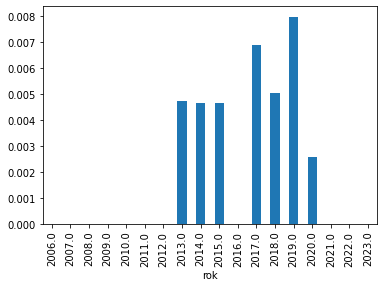

In [22]:
pd.Series(df[df['zeme_puvodu'] == 'Rusko'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

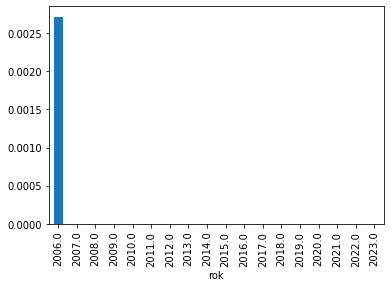

In [23]:
pd.Series(df[df['zeme_puvodu'] == 'Ukrajina'].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

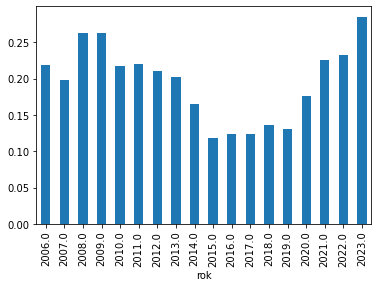

In [24]:
pd.Series(df[df['zeme_puvodu'].isnull()].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

## Žánry

In [25]:
zanry = df.explode('zanry')

In [26]:
zanry.groupby('zanry')['track'].nunique().nlargest(25)

zanry
pop music                     1388
pop rock                       600
hip hop                        529
contemporary R&B               470
alternativní rock              422
elektropop                     400
rock                           400
dance-pop                      329
elektronická taneční hudba     317
synthpop                       268
house music                    254
taneční hudba                  242
electro house                  229
rhythm and blues               184
soul                           184
progressive house              173
indie pop                      151
elektronická hudba             137
deep house                     124
pop punk                       123
reggae                         119
soft rock                      104
pop rap                        100
folk                            96
folk pop                        94
Name: track, dtype: int64

In [27]:
hop = zanry[zanry['zanry'] == 'hip hop']['track'].drop_duplicates().to_list()

<Axes: xlabel='rok'>

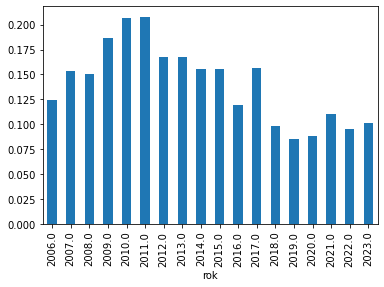

In [28]:
(df[df['track'].isin(hop)].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

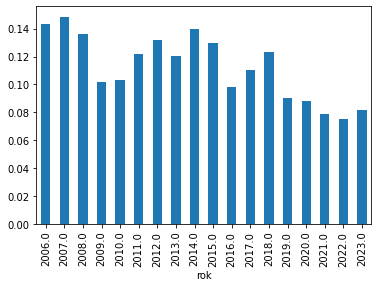

In [29]:
(df[df['track'].isin(zanry[zanry['zanry'] == 'rock']['track'].drop_duplicates().to_list())].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()

<Axes: xlabel='rok'>

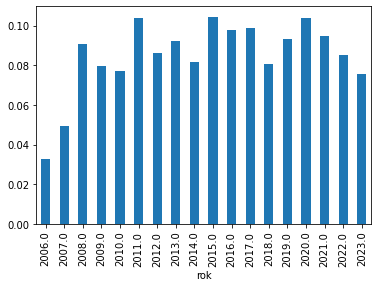

In [30]:
(df[df['track'].isin(zanry[zanry['zanry'] == 'elektronická taneční hudba']['track'].drop_duplicates().to_list())].groupby('rok')['track'].nunique() / df.groupby('rok')['track'].nunique()).plot.bar()